In [45]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
!cd yolov5 & pip install -r requirements.txt 

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\pranati/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-6-28 Python-3.7.16 torch-1.13.1+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [11]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make detections on Images

In [12]:
img = 'https://media.istockphoto.com/id/159406920/photo/aerial-view-of-cars-in-traffic.jpg?s=2048x2048&w=is&k=20&c=LIS80fqJHvj-XxhcJhNx8wwU2FQApf9pR4PR4_EhmP0='

In [13]:
results = model(img)
results.print()

image 1/1: 1366x2048 30 cars, 1 truck
Speed: 754.3ms pre-process, 207.1ms inference, 17.0ms NMS per image at shape (1, 3, 448, 640)


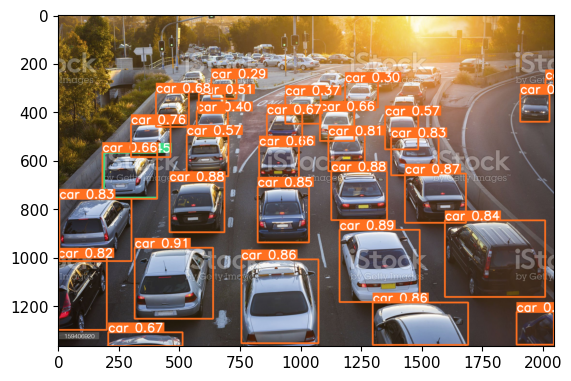

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# 4. Real Time Detection

In [18]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Making detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from Search

In [2]:
import uuid    #to create unique identifier
import os    #leverage and work with file parts
import time    #to take break 

In [3]:
IMAGES_PATH =os.path.join('data', 'images') # save data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [20]:
cap = cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)
    
    #Loop through images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #Webcam feed
        ret, frame=cap.read()
        
        #Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()) + '.jpg') #uuid : component
        
        #Writes out image to file
        cv2.imwrite(imgname, frame)
        
        #Render to the screen
        cv2.imshow('Image Collection', frame)
        
        #2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows() 

In [4]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.93b63978-1d6f-11ee-b219-a4fc775f36e6.jpg
data\images\awake.93b63979-1d6f-11ee-b1da-a4fc775f36e6.jpg
data\images\awake.93b6397a-1d6f-11ee-954e-a4fc775f36e6.jpg
data\images\awake.93b6397b-1d6f-11ee-aebc-a4fc775f36e6.jpg
data\images\awake.93b6397c-1d6f-11ee-84e7-a4fc775f36e6.jpg
data\images\awake.93b6397d-1d6f-11ee-85cc-a4fc775f36e6.jpg
data\images\awake.93b6397e-1d6f-11ee-912c-a4fc775f36e6.jpg
data\images\awake.93b6397f-1d6f-11ee-a0f5-a4fc775f36e6.jpg
data\images\awake.93b63980-1d6f-11ee-b28d-a4fc775f36e6.jpg
data\images\awake.93b63981-1d6f-11ee-861e-a4fc775f36e6.jpg
data\images\awake.93b63982-1d6f-11ee-bd03-a4fc775f36e6.jpg
data\images\awake.93b63983-1d6f-11ee-b8ad-a4fc775f36e6.jpg
data\images\awake.93b63984-1d6f-11ee-9a0c-a4fc775f36e6.jpg
data\images\awake.93b63985-1d6f-11ee-a5b5-a4fc775f36e6.jpg
data\images\awake.93b63986-1d6f-11ee-801c-a4fc775f36e6.jpg
data\images\awake.93b63987-1d6f-11ee-ba8d-a4fc775f36e6.jpg
data\images\awake.93b63988-1d6f-11ee-9d49-a4fc775f36e6.j

In [5]:
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [9]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


# 6. Load Custom Model

In [39]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\pranati/.cache\torch\hub\master.zip
YOLOv5  2023-7-8 Python-3.7.16 torch-1.13.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [40]:
img = os.path.join('data', 'images','awake.7e790f78-1d08-11ee-be61-a4fc775f36e6.jpg')

In [41]:
results = model(img)

In [42]:
results.print()

image 1/1: 480x640 (no detections)
Speed: 6.6ms pre-process, 159.9ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


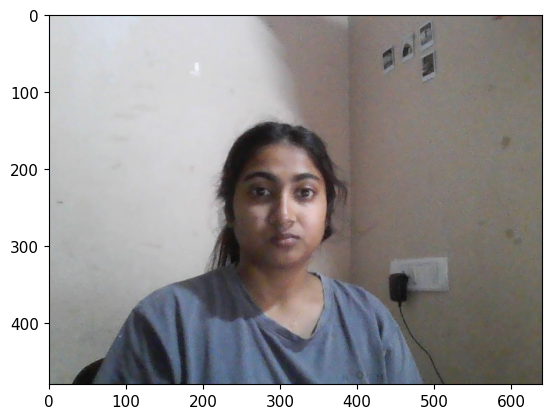

In [43]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [44]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Making detections
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()